In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error




file_path="/Users/chenxinghe/Desktop/Hugo/ESILV/A4/Pi2Bitcoin/Excel/"
btc=pd.read_excel(file_path+ "btc.xlsx")
all_data=[]
all_data.append(btc)
all_data_ticker=['AMAZON','APPLE','DowJones','google','Nasdaq','natural gas','S&P','TESLA','VIX','wti','USYC2Y10',
        'FDTR','CL1 COMB Comdty','IUTPELC','NG1 COMB Comdty','CESIUSD',
        'SOX','federal_rate_target','brent','Cac40','ftse','GOLD','EURR002W','TED SPREAD EUR','GETB1','DEYC2Y10',
            'BDIY','CO1 COMB Comdty','CESIEUR','TSEMIL','NKY','BOJDPBAL','TED SPREAD JPN','JPYC2Y10','CESIJPY','eurodollar','gbpusd','renminbiusd','yenusd','TED SPREAD US','GJGB3M','GCNY3M','CESICNY']

all_data_name=['Amazon','Apple','DowJones','Google','Nasdaq','Natural Gas','S&P','Tesla','Vix','WTI','Yield Curve US','FED Policy Rates','WTI Crude Future',
              'USD Electricity Price Index','Natural Gas Future','CITI US Economic Surprise Index','PHLX Semiconductor Sector Index (Chg)','USFederal Rate Target','Brent','Cac40','FTSE','GOLD','ECB Policy Rates','TED Spread Europe','Tx Gov. Allemand 3 mois',
                  'Yield Curve Germany','Baltic Dry','Brent Crude Future',
                  'CITI European Economic Surprise Index','Stoxx Europe TM Semiconductor Index (Chg)','Nikkei','BOJ Policy Rates','TED Spread Japan','Yield Curve Japan',
                 'CITI Japan Economic Surprise Index','Euro/Dollar','Gbp/Dollar','Renminbi/Dollar','Yen/Dollar','TED Spread US','Generic Japan 3 Month Government Bond','China Government Bond Generic Bid Yield 3 month','CITI Chinese Economic Surprise Index']
for ticker in all_data_ticker:
    all_data.append(pd.read_excel(file_path+"ALLDATA/"+ticker+".xlsx"))

print("\nRaw lengths\n")
keep_columns=['Date','Dernier Prix']
for element in all_data:
        element = element[keep_columns].copy()

start_date = pd.to_datetime('2011-01-03')

for element in all_data:
        element['Date'] = pd.to_datetime(element['Date']) 
        element.drop(element[element['Date'] < start_date].index, inplace=True)

print(f"Length of BTC : {len(btc)}")
for dataset, name in zip(all_data[1:], all_data_name):
        print(f"Length of {name}: {len(dataset)}")





Raw lengths

Length of BTC : 4075
Length of Amazon: 3276
Length of Apple: 3276
Length of DowJones: 3276
Length of Google: 3276
Length of Nasdaq: 3276
Length of Natural Gas: 3289
Length of S&P: 3276
Length of Tesla: 3276
Length of Vix: 3288
Length of WTI: 3289
Length of Yield Curve US: 3257
Length of FED Policy Rates: 3243
Length of WTI Crude Future: 3284
Length of USD Electricity Price Index: 3072
Length of Natural Gas Future: 3284
Length of CITI US Economic Surprise Index: 3351
Length of PHLX Semiconductor Sector Index (Chg): 3279
Length of USFederal Rate Target: 3269
Length of Brent: 3183
Length of Cac40: 3334
Length of FTSE: 3287
Length of GOLD: 3385
Length of ECB Policy Rates: 3309
Length of TED Spread Europe: 3307
Length of Tx Gov. Allemand 3 mois: 3308
Length of Yield Curve Germany: 3375
Length of Baltic Dry: 3251
Length of Brent Crude Future: 3364
Length of CITI European Economic Surprise Index: 3354
Length of Stoxx Europe TM Semiconductor Index (Chg): 3346
Length of Nikkei: 31

In [4]:
def calculate_daily_returns(df, price_column='Dernier Prix'):
    df['Rendement Quotidien'] = (df[price_column] - df[price_column].shift(1)) / df[price_column].shift(1)
    
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df['Rendement Quotidien'].fillna(0, inplace=True)
    
    # Supprimer la première ligne
    df = df.iloc[1:]

    return df

In [5]:
result = []
result_name_divers = []

common_dates_all = set(btc['Date'])


for element in all_data[1:]:
    common_dates = common_dates_all.intersection(set(element['Date']))
    all_data[0] = all_data[0][all_data[0]['Date'].isin(common_dates)].copy()
    element = element[element['Date'].isin(common_dates)].copy()
    calculate_daily_returns(all_data[0])
    calculate_daily_returns(element)
    asset_df = all_data[0]    

    X = asset_df['Rendement Quotidien'].values.reshape(-1, 1)
    y = element['Rendement Quotidien'].values   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    correlation_coefficient = np.corrcoef(X_test.flatten(), y_test)[0, 1]
    result.append(round(correlation_coefficient * 100, 2))
    all_data[0]=btc

for category_names in all_data_name:
    result_name_divers.append(category_names)

result, result_name_divers = zip(*[(r, n) for r, n in zip(result, result_name_divers) if not np.isnan(r)])

# Trier les résultats par ordre décroissant
sorted_results = sorted(zip(result, result_name_divers), reverse=True)

# Séparer les résultats triés en deux listes distinctes
sorted_coefficients, sorted_names = zip(*sorted_results)

# Créer un dictionnaire avec les résultats triés
results_dict = {'Nom': sorted_names, 'Coefficient': sorted_coefficients}

# Créer un DataFrame à partir du dictionnaire
result_correlation = pd.DataFrame(results_dict)

print("Correlation table with returns of Bitcoin :\n")
print(result_correlation)



c:\Users\maxim\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\maxim\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\Users\maxim\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\maxim\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
c:\Users\maxim\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\maxim\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Correlation table with returns of Bitcoin :

                                                Nom  Coefficient
0                                  ECB Policy Rates        12.96
1                                Brent Crude Future        10.44
2                                 TED Spread Europe         8.36
3                                               S&P         7.86
4                                          DowJones         7.84
5             PHLX Semiconductor Sector Index (Chg)         6.76
6                                              FTSE         6.62
7                                       Euro/Dollar         6.48
8                                             Cac40         6.23
9         Stoxx Europe TM Semiconductor Index (Chg)         5.87
10                                Yield Curve Japan         5.81
11                                           Nasdaq         5.43
12                                 WTI Crude Future         5.04
13                                           

In [6]:
# Sélectionner les trois meilleures corrélations
top_3_correlations = result_correlation.head(3)

# Sélectionner les trois moins bonnes corrélations
bottom_3_correlations = result_correlation.tail(3)

# Afficher les résultats
print("Top 5 Correlations:\n", top_3_correlations)
print("\nBottom 5 Correlations:\n", bottom_3_correlations)
top_5_names = top_3_correlations['Nom'].tolist()
bottom_5_names = bottom_3_correlations['Nom'].tolist()
df_name_predict_test = top_5_names + bottom_5_names

Top 5 Correlations:
                   Nom  Coefficient
0    ECB Policy Rates        12.96
1  Brent Crude Future        10.44
2   TED Spread Europe         8.36

Bottom 5 Correlations:
                  Nom  Coefficient
37               Vix        -8.15
38  TED Spread Japan        -8.59
39     TED Spread US        -8.92


In [7]:
df_ticker_predict=[]
df_name_predict=[]

indices_in_all_data_names = []
for name in all_data_name:
    if name in df_name_predict_test:
        index = all_data_name.index(name)
        df_ticker_predict.append(all_data_ticker[index])
        df_name_predict.append(all_data_name[index])
        
test_predict=[]
test_predict.append(btc)
for ticker in df_ticker_predict:
    test_predict.append(pd.read_excel(file_path+"ALLDATA/"+ticker+".xlsx"))

print("\nRaw lengths\n")
keep_columns=['Date','Dernier Prix']
for element in test_predict:
        element = element[keep_columns].copy()

start_date = pd.to_datetime('2011-01-03')

for element in all_data:
        element['Date'] = pd.to_datetime(element['Date']) 
        element.drop(element[element['Date'] < start_date].index, inplace=True)

test_predict=test_predict[:-1] #Drop TED SPREAD US car trop peu de valeurs

print(f"Length of BTC : {len(btc)}")
for dataset, name in zip(test_predict[1:], df_name_predict):
        print(f"Length of {name}: {len(dataset)}")



Raw lengths

Length of BTC : 4075
Length of Vix: 3303
Length of ECB Policy Rates: 3324
Length of TED Spread Europe: 3322
Length of Brent Crude Future: 3438
Length of TED Spread Japan: 3045


In [8]:
print("\nAdjusted lengths\n")
common_dates_all = set(test_predict[0]['Date'])

common_dates_all = set(test_predict[0]['Date'])
for dataset in test_predict[1:]:
    common_dates_all = common_dates_all.intersection(set(dataset['Date']))

for i, dataset in enumerate(test_predict):
    test_predict[i] = calculate_daily_returns(dataset[dataset['Date'].isin(common_dates_all)].copy()).reset_index(drop=True)

print(f"Length of BTC : {len(test_predict[0])}")
for dataset, name in zip(test_predict[1:], df_name_predict):
        print(f"Length of {name}: {len(dataset)}")


Adjusted lengths

Length of BTC : 2932
Length of Vix: 2932
Length of ECB Policy Rates: 2932
Length of TED Spread Europe: 2932
Length of Brent Crude Future: 2932
Length of TED Spread Japan: 2932


In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Fonction pour effectuer le test de Dickey-Fuller
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Stationary?' , 'Non-Stationary' if result[1] > 0.05 else 'Stationary')
    print('\n')

result=[]
for element in test_predict:
    df = element['Rendement Quotidien']
    adf_result = adfuller(df)
    p_value = adf_result[1]
    stationary_status = 'Stationary' if p_value < 0.05 else 'Non-Stationary'
    result.append(stationary_status)

all_stationary=True
for i in range(0,len(result)):
    if(result[i]=="Non-Stationary"):
        all_stationary=False
if(all_stationary==True):
    print("All returns are stationary")
print("\n")


All returns are stationary




In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# Création de X en concaténant les features de tous les DataFrames
X = pd.concat([test_predict[i]['Rendement Quotidien'] for i in range(1, len(test_predict))], axis=1)
y = test_predict[0]['Rendement Quotidien']

# Utiliser les meilleurs hyperparamètres obtenus de la recherche d'hyperparamètres
best_params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}

# Créer le modèle RandomForestRegressor avec les meilleurs hyperparamètres
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraînement du modèle avec les meilleurs hyperparamètres
best_rf_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions = best_rf_model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Afficher les valeurs prédites et les vraies valeurs
results = pd.DataFrame({'True Values': y_test, 'Predicted Values': predictions})
print(results)


Mean Squared Error: 0.005250867220638044
R-squared: -0.03517856669618569
      True Values  Predicted Values
1357    -0.072316          0.001944
2367     0.401110         -0.005347
2822     0.146471         -0.004288
2126     0.030113          0.019325
1544     0.000892          0.010497
...           ...               ...
497     -0.129758          0.000679
2382     0.289284         -0.009119
325     -0.004224          0.003574
342     -0.065738         -0.002020
2210    -0.054510         -0.013283

[880 rows x 2 columns]


In [16]:
from sklearn.model_selection import cross_val_score, KFold

# Créer le modèle RandomForestRegressor avec les meilleurs hyperparamètres
best_rf_model = RandomForestRegressor(**best_params, random_state=42)

# Définir le nombre de plis pour la validation croisée (par exemple, 5)
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Effectuer la validation croisée
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# Convertir les scores MSE négatifs en valeurs positives
cv_scores = -cv_scores

# Afficher les résultats de la validation croisée
print(f'Cross-validated MSE scores: {cv_scores}')
print(f'Mean MSE: {cv_scores.mean()}')
print(f'Standard Deviation of MSE: {cv_scores.std()}')

Cross-validated MSE scores: [0.00340567 0.00416083 0.00301669 0.00366273 0.00278666]
Mean MSE: 0.0034065147119591833
Standard Deviation of MSE: 0.0004839051089341991


In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Effectuer la recherche d'hyperparamètres par validation croisée
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Utiliser les meilleurs hyperparamètres pour entraîner le modèle
best_rf_model = grid_search.best_estimator_


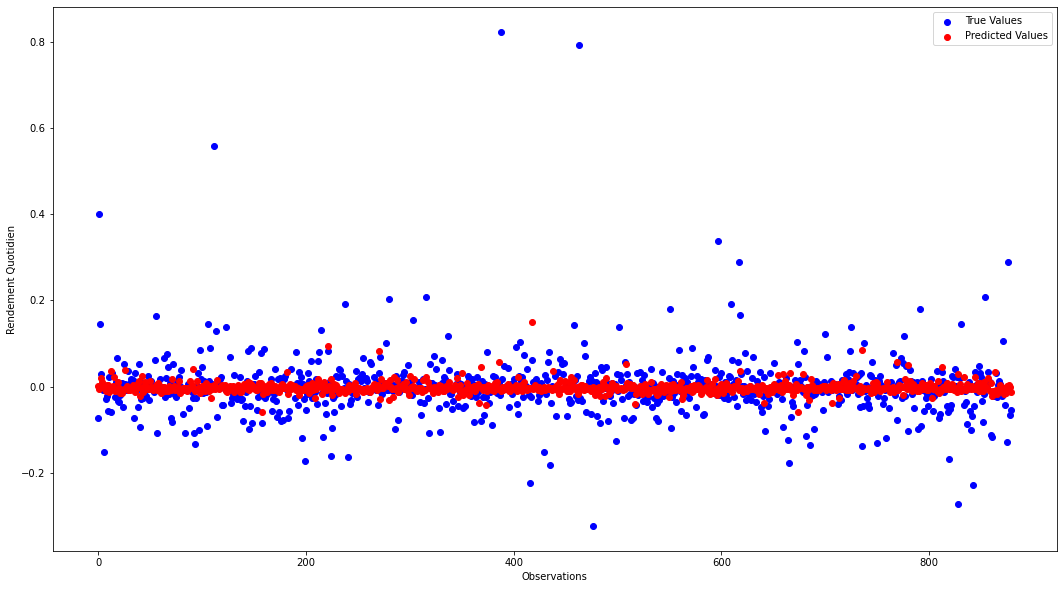

In [15]:
# Création de la figure avec une taille spécifiée (par exemple, 10 pouces par 6 pouces)
fig, ax = plt.subplots(figsize=(18, 10))

# Plot des valeurs réelles en bleu
ax.scatter(range(len(y_test)), y_test, color='blue', label='True Values')

# Plot des valeurs prédites en rouge
ax.scatter(range(len(predictions)), predictions, color='red', label='Predicted Values')

# Ajouter des labels et une légende
ax.set_xlabel('Observations')
ax.set_ylabel('Rendement Quotidien')
ax.legend()

# Afficher le graphique
plt.show()